In [6]:
# Import required libraries

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from scipy import misc
import random
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from shutil import copyfile
import os
import zipfile

%matplotlib inline

In [5]:
# Manually download the data and extract the zip file
# We are using microsoft provided public data
# Download link - https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

local_zip = r'D:/practice/tensorflow/kagglecatsanddogs_3367a.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'D:/practice/tensorflow/')
zip_ref.close()
print(len(os.listdir(r'D:/practice/tensorflow/PetImages/Cat/')))
print(len(os.listdir(r'D:/practice/tensorflow/PetImages/Dog/'))) 

12501
12501


In [7]:
# Prepare the data

try:
    os.mkdir(r'D:/practice/tensorflow/cats-v-dogs')
    os.mkdir(r'D:/practice/tensorflow/cats-v-dogs/training')
    os.mkdir(r'D:/practice/tensorflow/cats-v-dogs/testing')
    os.mkdir(r'D:/practice/tensorflow/cats-v-dogs/training/cats')
    os.mkdir(r'D:/practice/tensorflow/cats-v-dogs/training/dogs')
    os.mkdir(r'D:/practice/tensorflow/cats-v-dogs/testing/cats')
    os.mkdir(r'D:/practice/tensorflow/cats-v-dogs/testing/dogs')
except OSError:
    pass

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
 
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
 
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
 
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
 
 
CAT_SOURCE_DIR = r"D:/practice/tensorflow/PetImages/Cat/"
TRAINING_CATS_DIR = r"D:/practice/tensorflow/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = r"D:/practice/tensorflow/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = r"D:/practice/tensorflow/PetImages/Dog/"
TRAINING_DOGS_DIR = r"D:/practice/tensorflow/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = r"D:/practice/tensorflow/cats-v-dogs/testing/dogs/"
 
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [8]:
print(len(os.listdir(r'D:/practice/tensorflow/cats-v-dogs/training/cats/')))
print(len(os.listdir(r'D:/practice/tensorflow/cats-v-dogs/training/dogs/')))
print(len(os.listdir(r'D:/practice/tensorflow/cats-v-dogs/testing/cats/')))
print(len(os.listdir(r'D:/practice/tensorflow/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [9]:
# Define and compile the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) 

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Split the model

TRAINING_DIR = r"D:/practice/tensorflow/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
 
VALIDATION_DIR = r"D:/practice/tensorflow/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))
 

Found 22498 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [12]:
# Train the model

# we can use model.fit_generator as well but since model.fit_generator is deprecated will use model.fit method for training

history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
225/225 [==============================] - 231s 1s/step - loss: 0.5741 - accuracy: 0.6970 - val_loss: 0.4563 - val_accuracy: 0.7839
Epoch 2/15
225/225 [==============================] - 239s 1s/step - loss: 0.4671 - accuracy: 0.7790 - val_loss: 0.3744 - val_accuracy: 0.8291
Epoch 3/15
225/225 [==============================] - 239s 1s/step - loss: 0.4016 - accuracy: 0.8165 - val_loss: 0.3173 - val_accuracy: 0.8587
Epoch 4/15
225/225 [==============================] - 236s 1s/step - loss: 0.3434 - accuracy: 0.8527 - val_loss: 0.2653 - val_accuracy: 0.8888
Epoch 5/15
225/225 [==============================] - 224s 995ms/step - loss: 0.2837 - accuracy: 0.8799 - val_loss: 0.1854 - val_accuracy: 0.9304
Epoch 6/15
225/225 [==============================] - 246s 1s/step - loss: 0.2117 - accuracy: 0.9131 - val_loss: 0.1394 - val_accuracy: 0.9528
Epoch 7/15
225/225 [==============================] - 236s 1s/step - loss: 0.1510 - accuracy: 0.9425 - val_loss: 0.0925 - val_accuracy: 0.9

<Figure size 432x288 with 0 Axes>

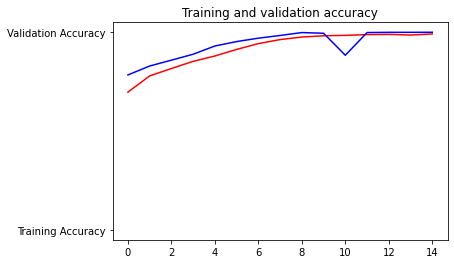

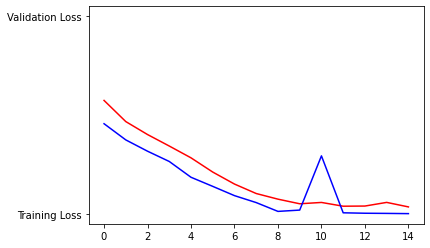

<Figure size 432x288 with 0 Axes>

In [13]:
# Explore the results

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs
 
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
 
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [15]:
# Test the model
 
for fn in os.listdir(r'D:/practice/tensorflow/catdog/'):
 
  # predicting images
  path = r'D:/practice/tensorflow/catdog/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

[1.]
c.jpg is a dog
[1.]
c1.jpg is a dog
[1.]
c2.jpg is a dog
[1.]
d.jpg is a dog
[1.]
d1.jpg is a dog
[1.]
d2.jpg is a dog
